### Ms.Jurairat Preechasin
### AT82.03: Machine Learning
**A1: Predicting Car Price**

In this assignment, you will solve a problem, i.e., Chaky company makes some car but he has difficulty
setting the price for the car. Please make a simple web-based car price prediction system.

**Note:** You are ENCOURAGED to work with your friends, but DISCOURAGED to blindly copy other’s
work. Both parties will be given 0.

**Note:** Comments should be provided sufficiently so we know you understand. Failure to do so can raise
suspicion of possible copying/plagiarism.

**Note:** You will be graded upon (1) documentation, (2) experiment, (3) implementation.

**Note:** This is a two-weeks assignment, but start early.

**Deliverables:** The GitHub link containing the jupyter notebook, a README.md of the github, and
the folder of your web application called ‘app’.

## 1.Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Checking Version of these libraries

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.25.2', '1.5.3', '0.12.2', '3.7.2')

**Task 1. Preparing the datasets** - Download the Car Price dataset from Google classroom. Perform
loading, EDA, preprocessing, model selection, · · · , inference. Grade will be given based on the how well
you adhere to best practices. There are some important coding considerations:

In [3]:
df = pd.read_csv("/root/.vscode-server/Cars.csv") #read file cars.csv


In [4]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of Car's data
df.shape

(8128, 13)

In [6]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Check Data types of Car's input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# Check these column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')


## 2. Exploratory Data Analysis
EDA is an essential step to inspect the data, so to better understand nature of the given data.

In [9]:
df_copy = df.copy() 

• For the feature owner, map First owner to 1, ..., Test Drive Car to 5

- First Owner as 1
- Second Owner as 2
- Third Owner as 3
- Fourth & Above Owner as 4
- Testing Drive Car as 5

In [10]:
dict_owner = {'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4,
            'Test Drive Car':5}
df_copy["owner"] = df_copy["owner"].map(dict_owner)
df_copy.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,1,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,1,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,1,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,1,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


• For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [11]:
df_copy[(df_copy["fuel"] == 'LPG') | (df_copy["fuel"] == 'CNG')] #Check fuel of selling car which are either LPG to CNG

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,1,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
35,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,2,33.44 km/kg,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0
90,Maruti Wagon R LXI LPG BSIV,2010,225000,44000,LPG,Dealer,Manual,1,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0
203,Maruti Wagon R LXI CNG,2016,360000,50000,CNG,Individual,Manual,1,26.6 km/kg,998 CC,58.16 bhp,77Nm@ 3500rpm,5.0
402,Maruti Eeco CNG 5 Seater AC,2020,409999,35000,CNG,Individual,Manual,1,20.88 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7308,Maruti Alto Green LXi (CNG),2010,155000,70000,CNG,Individual,Manual,2,26.83 km/kg,796 CC,38.4 bhp,62Nm@ 3000rpm,5.0
7543,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,2,33.44 km/kg,796 CC,40.3 bhp,60Nm@ 3500rpm,4.0
7642,Chevrolet Spark 1.0 LT LPG,2012,300000,70000,LPG,Individual,Manual,1,13.2 km/kg,995 CC,60.2 bhp,90.3Nm@ 4200rpm,5.0
7733,Maruti Eeco CNG 5 Seater AC BSIV,2015,380000,20000,CNG,Individual,Manual,1,21.94 km/kg,1196 CC,61.7 bhp,85Nm@ 3000rpm,5.0


In [12]:
df_copy = df_copy.loc[(df_copy["fuel"] != 'LPG') & (df_copy["fuel"] != 'CNG')]
df_copy.head(25)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,1,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,1,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,1,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0
10,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,2,19.01 kmpl,1461 CC,108.45 bhp,248Nm@ 2250rpm,5.0


-For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split

• For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

• Do the same for max power

In [13]:
df_copy[["mileage_value","mileage_unit"]] = df_copy["mileage"].str.split(pat=' ', expand = True)
df_copy[["engine_value","engine_unit"]] = df_copy["engine"].str.split(pat=' ', expand = True)
df_copy[["max_power_value","max_power_unit"]] = df_copy["max_power"].str.split(pat=' ', expand = True)
df_copy.drop(["mileage","engine","max_power"], axis=1, inplace=True)
df_copy.head(25)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,190Nm@ 2000rpm,5.0,23.4,kmpl,1248,CC,74,bhp
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,250Nm@ 1500-2500rpm,5.0,21.14,kmpl,1498,CC,103.52,bhp
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,kmpl,1497,CC,78,bhp
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,22.4 kgm at 1750-2750rpm,5.0,23.0,kmpl,1396,CC,90,bhp
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,kmpl,1298,CC,88.2,bhp
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,1,113.75nm@ 4000rpm,5.0,20.14,kmpl,1197,CC,81.86,bhp
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,2,59Nm@ 2500rpm,4.0,16.1,kmpl,796,CC,37,bhp
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,1,170Nm@ 1800-2400rpm,5.0,23.59,kmpl,1364,CC,67.1,bhp
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,1,160Nm@ 2000rpm,5.0,20.0,kmpl,1399,CC,68.1,bhp
10,Renault Duster 110PS Diesel RxL,2014,500000,68000,Diesel,Individual,Manual,2,248Nm@ 2250rpm,5.0,19.01,kmpl,1461,CC,108.45,bhp


For the feature brand, take only the first word and remove the rest

In [14]:
df_copy["brand"] = df_copy["name"].str.split(" ").str[0]
df_copy.drop(["name"], axis=1, inplace=True)
df_copy.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,torque,seats,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit,brand
0,2014,450000,145500,Diesel,Individual,Manual,1,190Nm@ 2000rpm,5.0,23.4,kmpl,1248,CC,74,bhp,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,2,250Nm@ 1500-2500rpm,5.0,21.14,kmpl,1498,CC,103.52,bhp,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,3,"12.7@ 2,700(kgm@ rpm)",5.0,17.7,kmpl,1497,CC,78,bhp,Honda
3,2010,225000,127000,Diesel,Individual,Manual,1,22.4 kgm at 1750-2750rpm,5.0,23.0,kmpl,1396,CC,90,bhp,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,1,"11.5@ 4,500(kgm@ rpm)",5.0,16.1,kmpl,1298,CC,88.2,bhp,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,1,113.75nm@ 4000rpm,5.0,20.14,kmpl,1197,CC,81.86,bhp,Hyundai
7,2001,45000,5000,Petrol,Individual,Manual,2,59Nm@ 2500rpm,4.0,16.1,kmpl,796,CC,37,bhp,Maruti
8,2011,350000,90000,Diesel,Individual,Manual,1,170Nm@ 1800-2400rpm,5.0,23.59,kmpl,1364,CC,67.1,bhp,Toyota
9,2013,200000,169000,Diesel,Individual,Manual,1,160Nm@ 2000rpm,5.0,20.0,kmpl,1399,CC,68.1,bhp,Ford
10,2014,500000,68000,Diesel,Individual,Manual,2,248Nm@ 2250rpm,5.0,19.01,kmpl,1461,CC,108.45,bhp,Renault


Drop the feature torque, simply because Chaky’s company does not understand well about it

In [15]:
df_copy.drop(['torque'], axis = 1, inplace = True)
df_copy.head(20)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,mileage_value,mileage_unit,engine_value,engine_unit,max_power_value,max_power_unit,brand
0,2014,450000,145500,Diesel,Individual,Manual,1,5.0,23.4,kmpl,1248,CC,74,bhp,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,2,5.0,21.14,kmpl,1498,CC,103.52,bhp,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,3,5.0,17.7,kmpl,1497,CC,78,bhp,Honda
3,2010,225000,127000,Diesel,Individual,Manual,1,5.0,23.0,kmpl,1396,CC,90,bhp,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,1,5.0,16.1,kmpl,1298,CC,88.2,bhp,Maruti
5,2017,440000,45000,Petrol,Individual,Manual,1,5.0,20.14,kmpl,1197,CC,81.86,bhp,Hyundai
7,2001,45000,5000,Petrol,Individual,Manual,2,4.0,16.1,kmpl,796,CC,37,bhp,Maruti
8,2011,350000,90000,Diesel,Individual,Manual,1,5.0,23.59,kmpl,1364,CC,67.1,bhp,Toyota
9,2013,200000,169000,Diesel,Individual,Manual,1,5.0,20.0,kmpl,1399,CC,68.1,bhp,Ford
10,2014,500000,68000,Diesel,Individual,Manual,2,5.0,19.01,kmpl,1461,CC,108.45,bhp,Renault


• You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it.

• Since selling price is a big number, it can cause your prediction to be very unstable. One trick
is to first transform the label using log transform, i.e.,

## Your final data should look like this: cleaned data

In [16]:
# convert values of mileage, engine and max_power into float data type
df_copy[["mileage","engine","max_power"]] = df_copy[["mileage_value","engine_value","max_power_value"]].astype('float64')
df_copy.drop(["mileage_value","engine_value","max_power_value",
        "mileage_unit","engine_unit","max_power_unit"], axis=1, inplace = True)

# rearrange these columns
df_copy = df_copy.reindex(columns = ['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'])

df_copy

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [17]:
# Checking what categories of brand, fuel, seller type and owner
print("categories of brand are", df_copy["brand"].unique())
print("categories of fuel are", df_copy["fuel"].unique())
print("categories of seller_type are", df_copy["seller_type"].unique())
print("categories of owner are", df_copy["owner"].unique())

categories of brand are ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
categories of fuel are ['Diesel' 'Petrol']
categories of seller_type are ['Individual' 'Dealer' 'Trustmark Dealer']
categories of owner are [1 2 3 4 5]


In [18]:
# showing the rows and columns of df_copy
df_copy.shape

(8033, 12)

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.9+ KB


In [20]:
df_copy.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,8033.000000,8.033000e+03,8.033000e+03,8033.000000,7819.000000,7819.000000,7825.000000,7819.000000
mean,2013.818748,6.427361e+05,6.973882e+04,1.460227,19.390375,1463.090677,91.864733,5.421281
std,4.031655,8.098635e+05,5.664361e+04,0.720497,4.001777,504.655439,35.846839,0.962876
min,1983.000000,2.999900e+04,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,1.000000,16.780000,1197.000000,69.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,2.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,5.000000,42.000000,3604.000000,400.000000,14.000000


In [21]:
df_copy.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

# 2. EDA= Exploratory data analysis

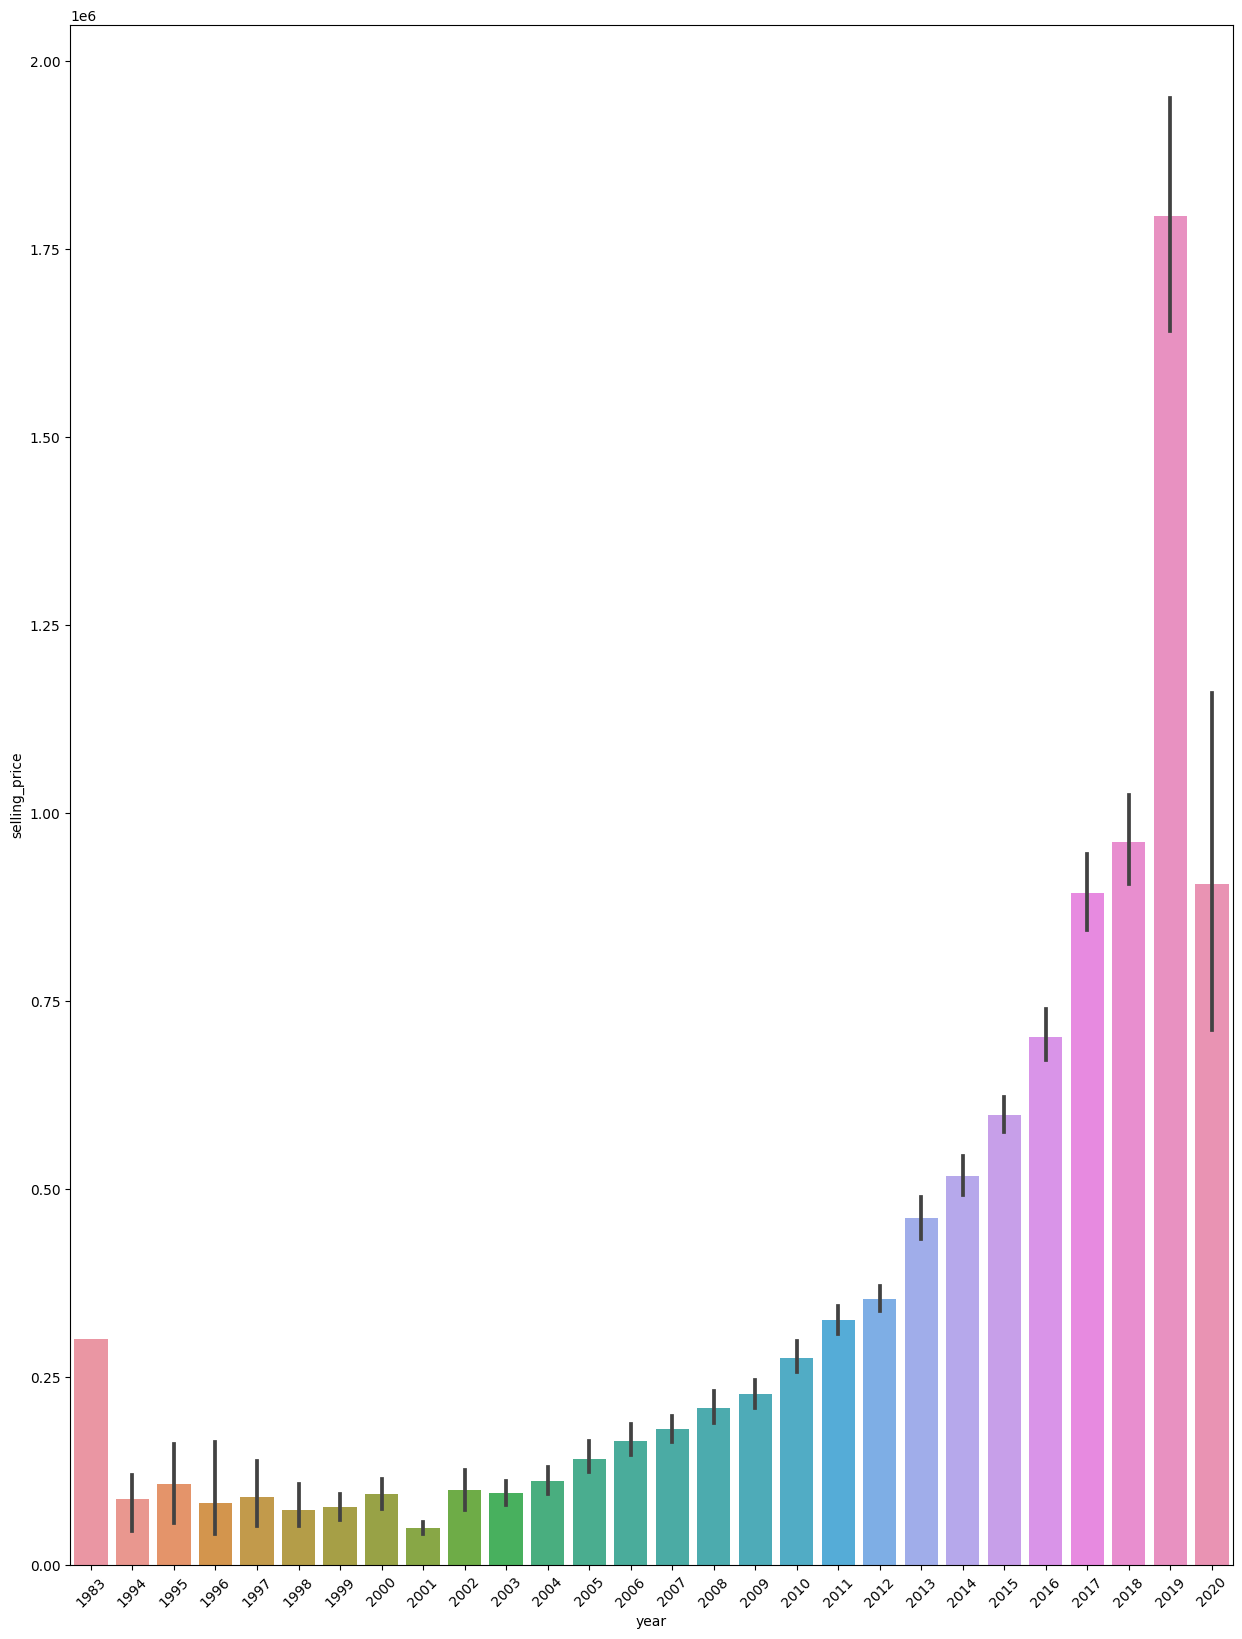

In [22]:
# show a bar chart for selling price yearly

plt.figure(figsize = (15,20))
sns.barplot(data = df_copy, x = "year", y = "selling_price")
plt.xticks(rotation = 45)
plt.show()

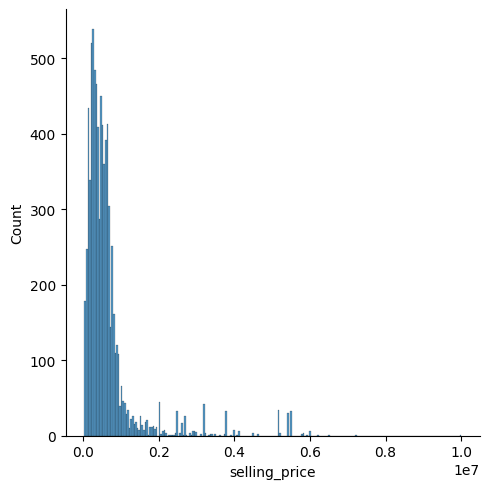

In [23]:
# show a histogram plot for selling price
sns.displot(x = df_copy["selling_price"])

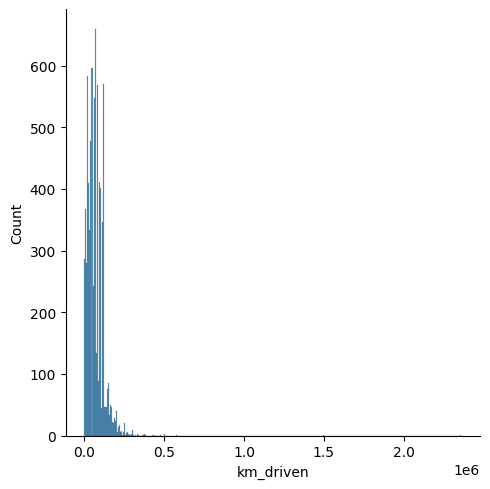

In [24]:
# show a histogram plot for km_driven
sns.displot(x = df_copy["km_driven"])

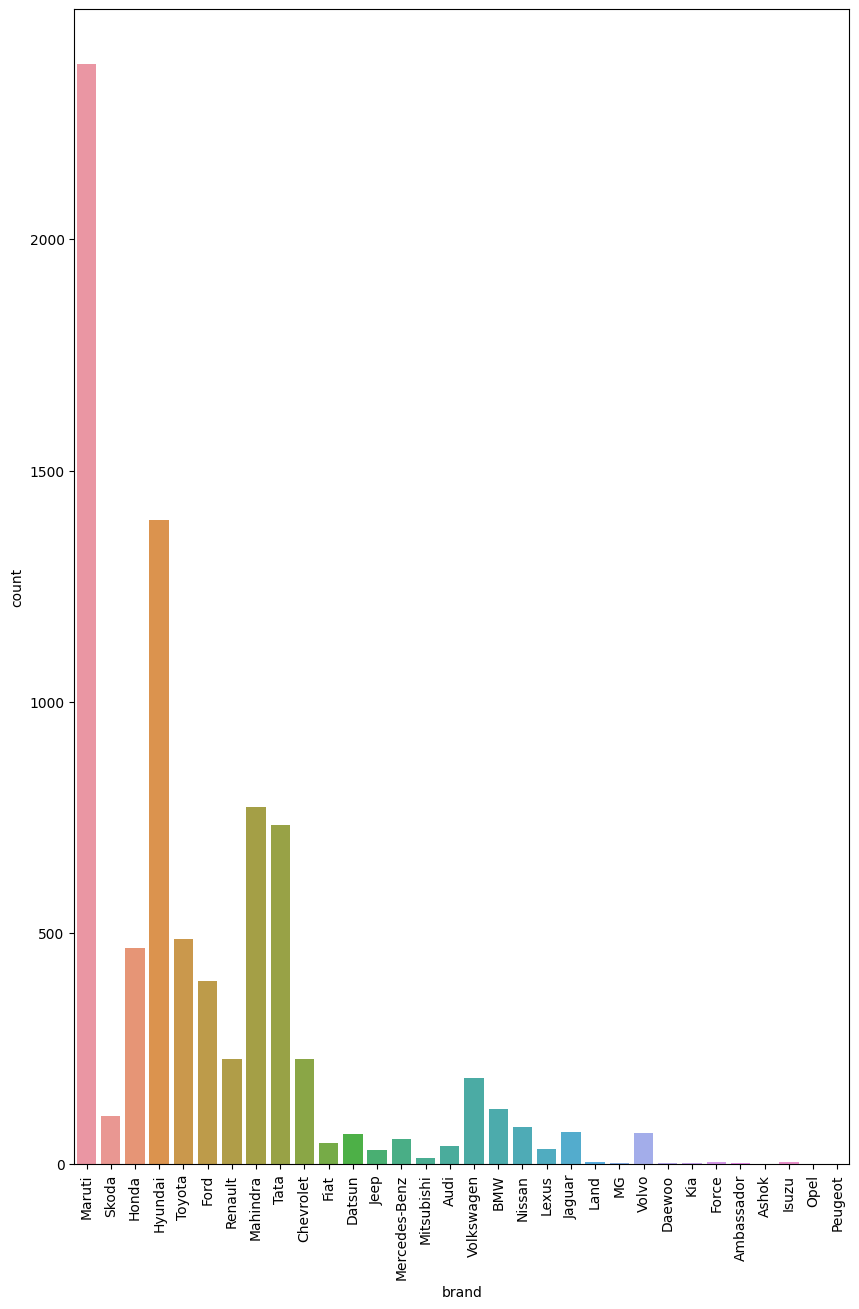

In [25]:
# show a countplot for car brand of df_copy

plt.figure(figsize = (10,15))
sns.countplot(data = df_copy, x = 'brand')
plt.xticks(rotation = 90)
plt.show()

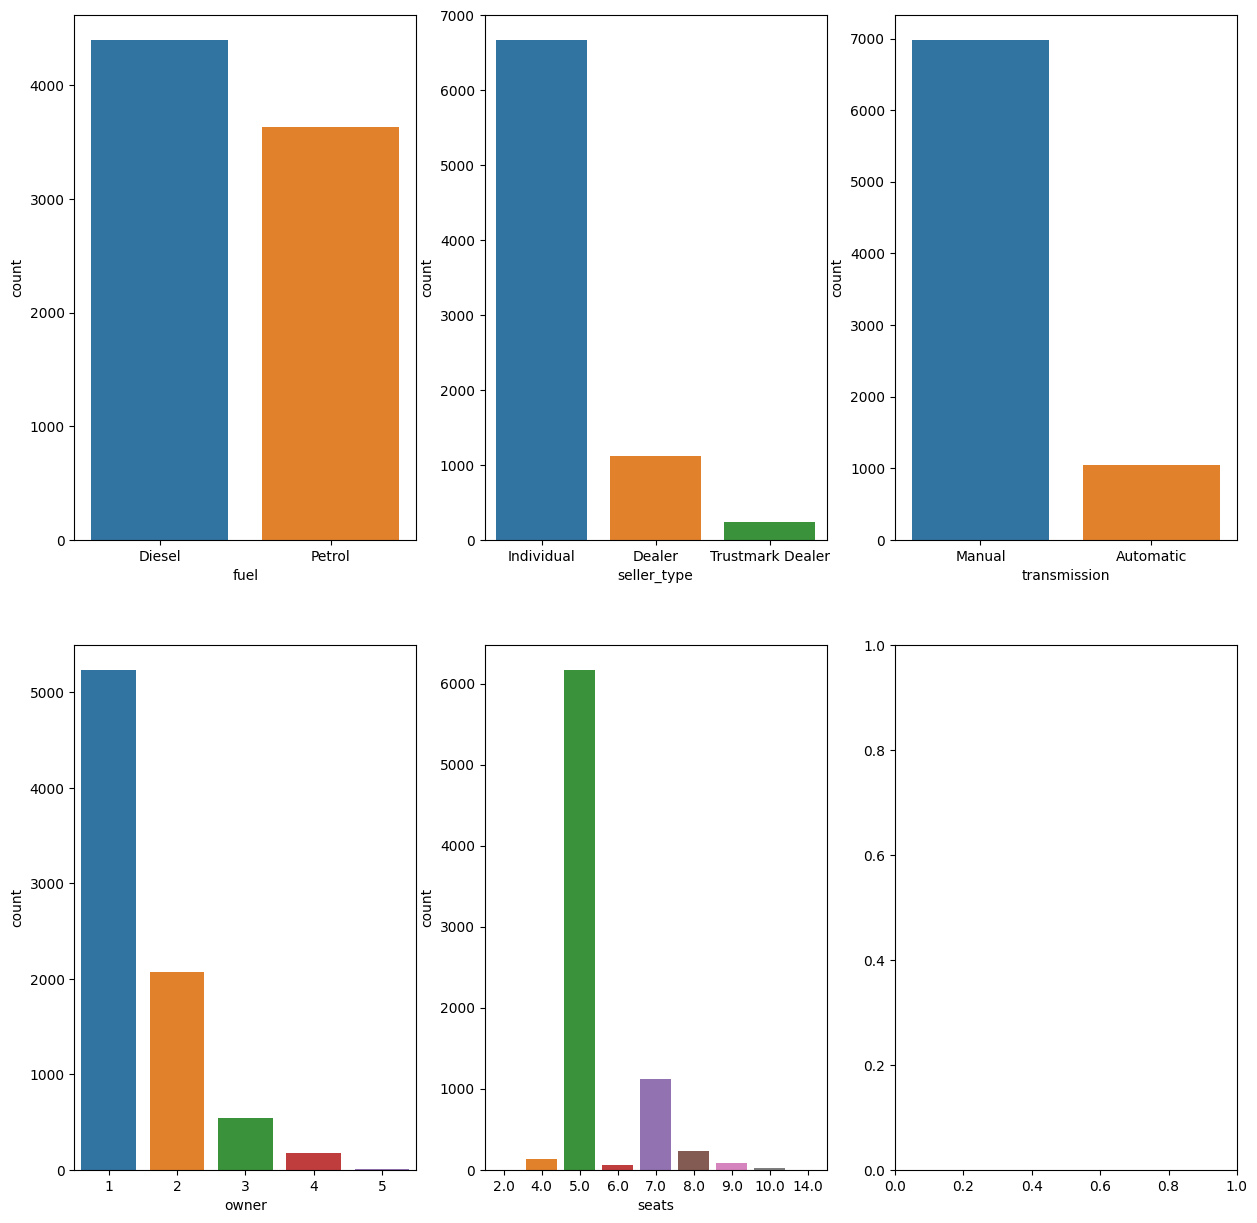

In [26]:
# show a countplot for types of fuel, seller_type, transmission, and owner and numbers of seats

fig, ax = plt.subplots(2,3, figsize = (15,15))
for i, col in enumerate(["fuel", "seller_type", "transmission", "owner","seats"]):
    graph = sns.countplot(data = df_copy, x = col, ax = ax[i//3,i%3])

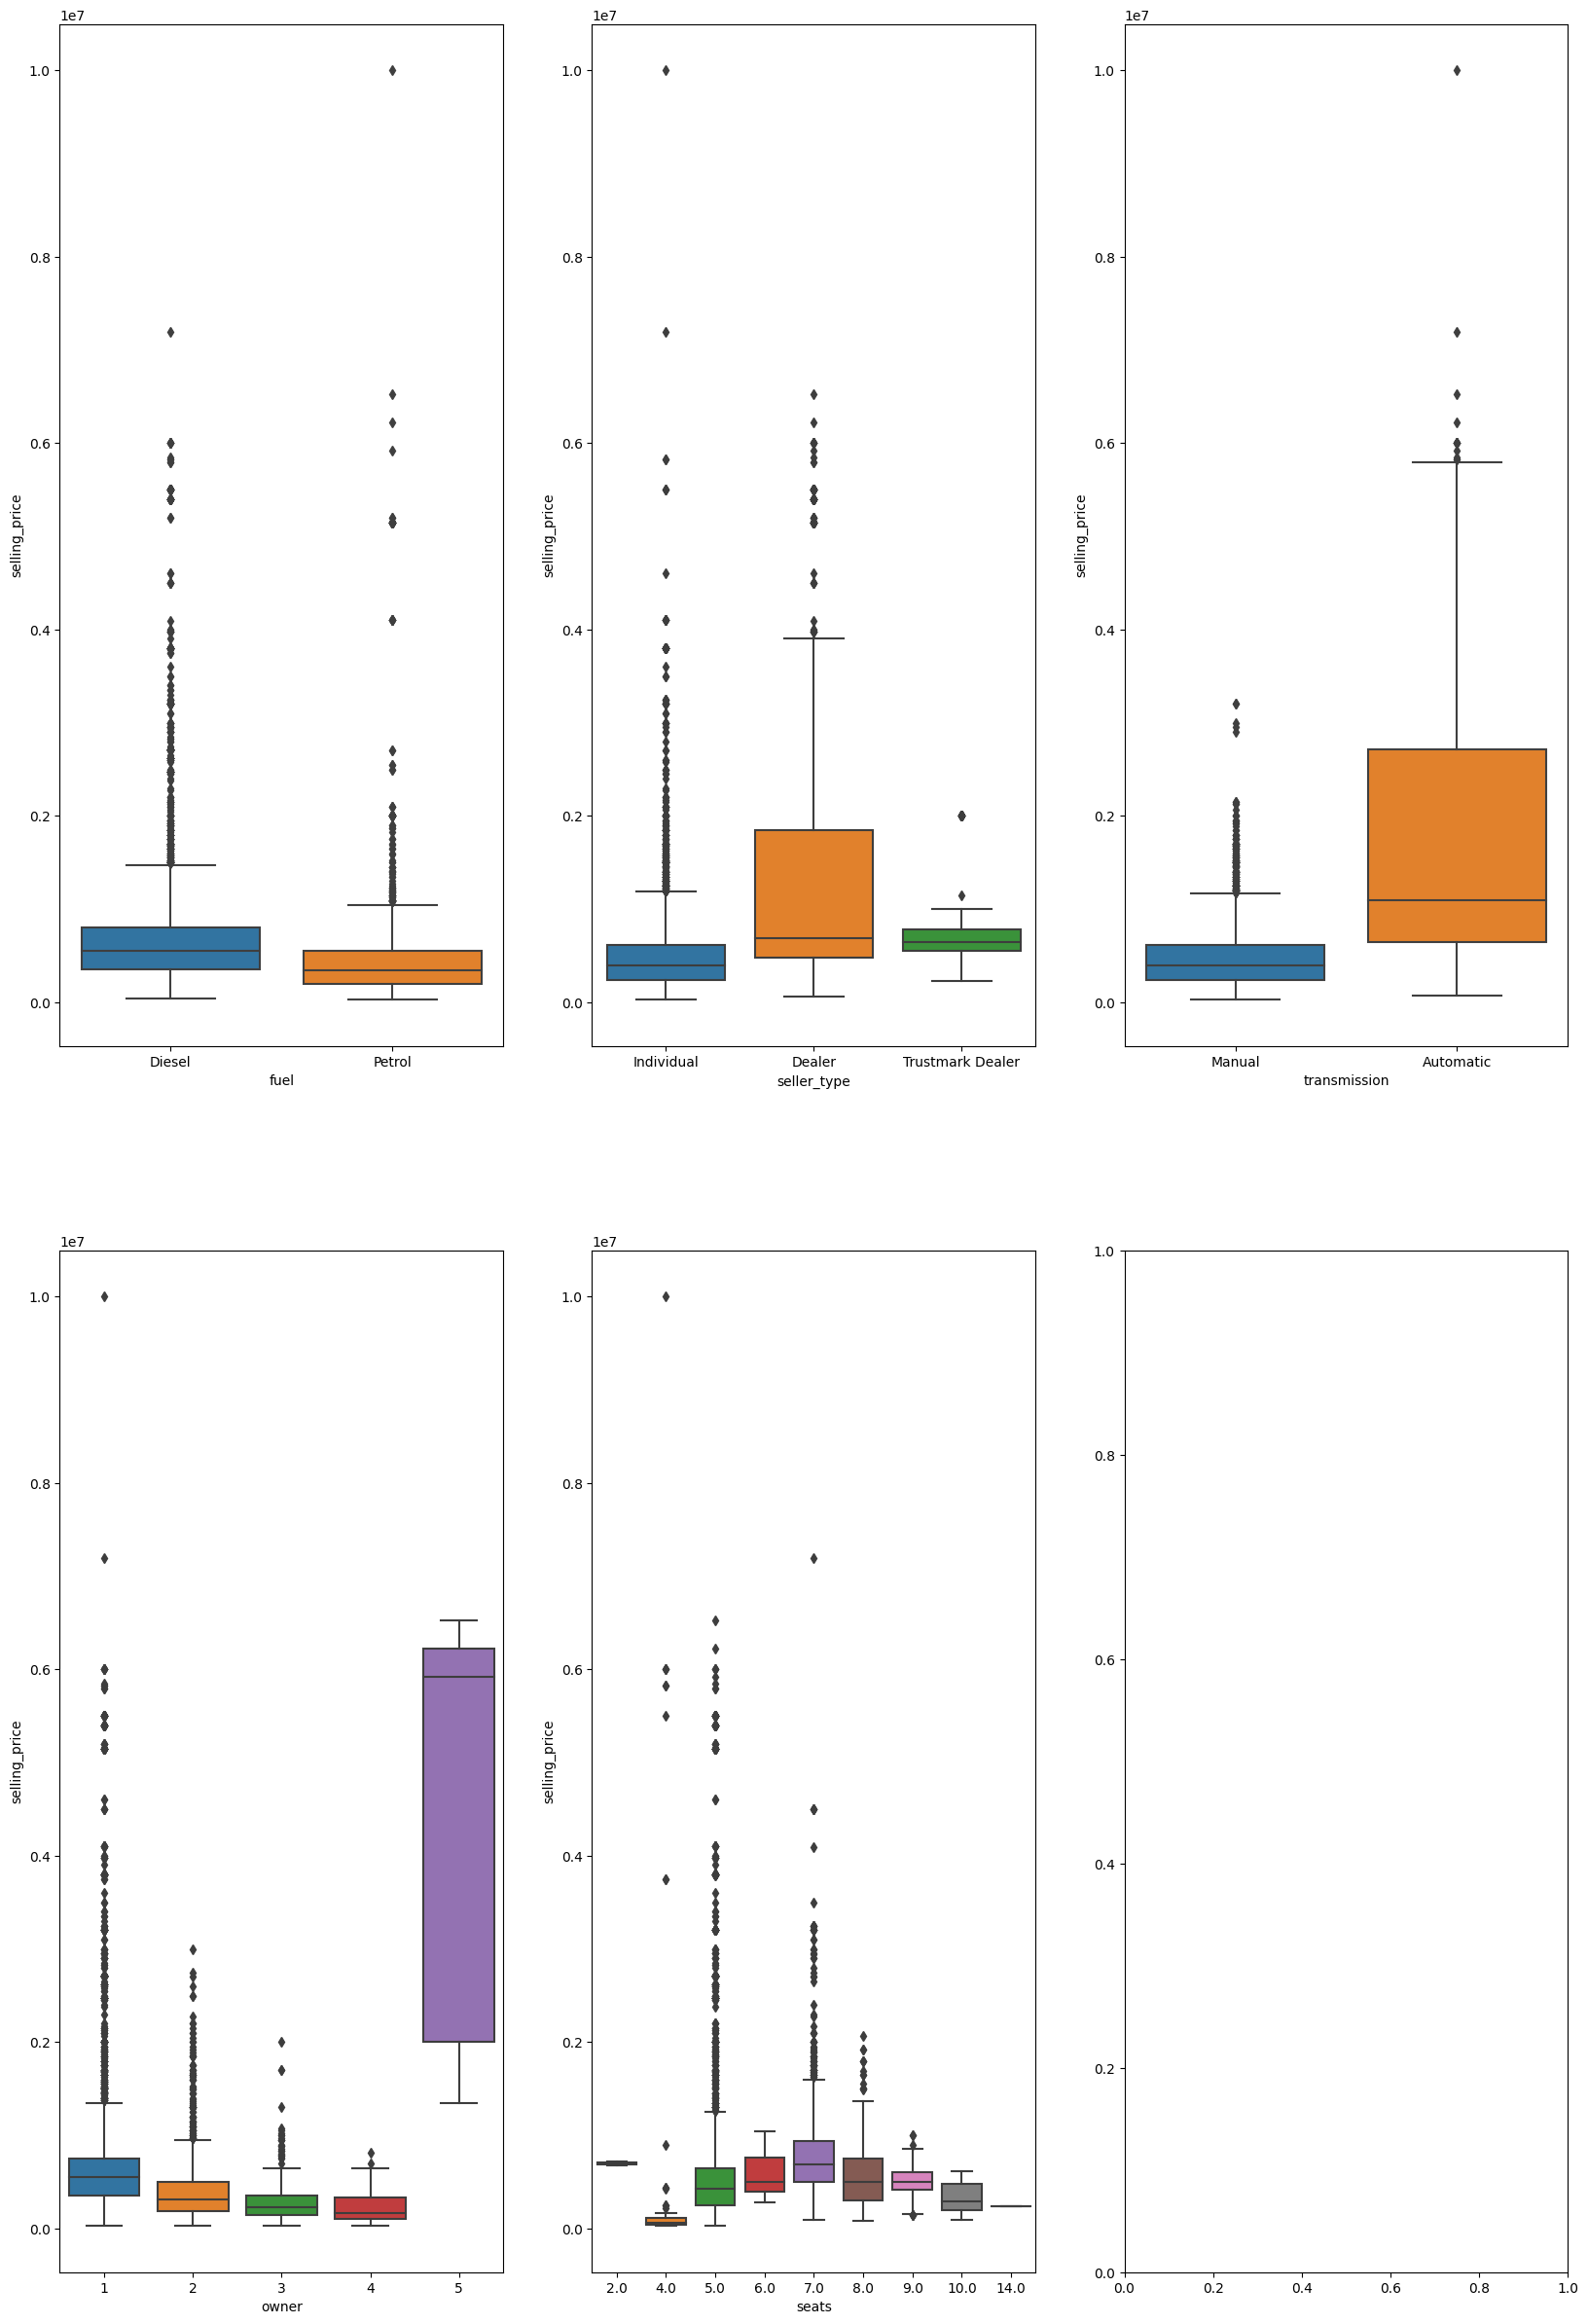

In [27]:
#show a boxplot of selling car price in each types of fuel, seller_type,transmission, and owner and numbers of seats

fig, ax = plt.subplots(2,3, figsize = (20,30))
for i, col in enumerate(["fuel", "seller_type", "transmission", "owner", "seats"]):
    sns.boxplot(data = df_copy, x = col, y = "selling_price", ax = ax[i//3,i%3])

You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it.

<Axes: xlabel='owner', ylabel='selling_price'>

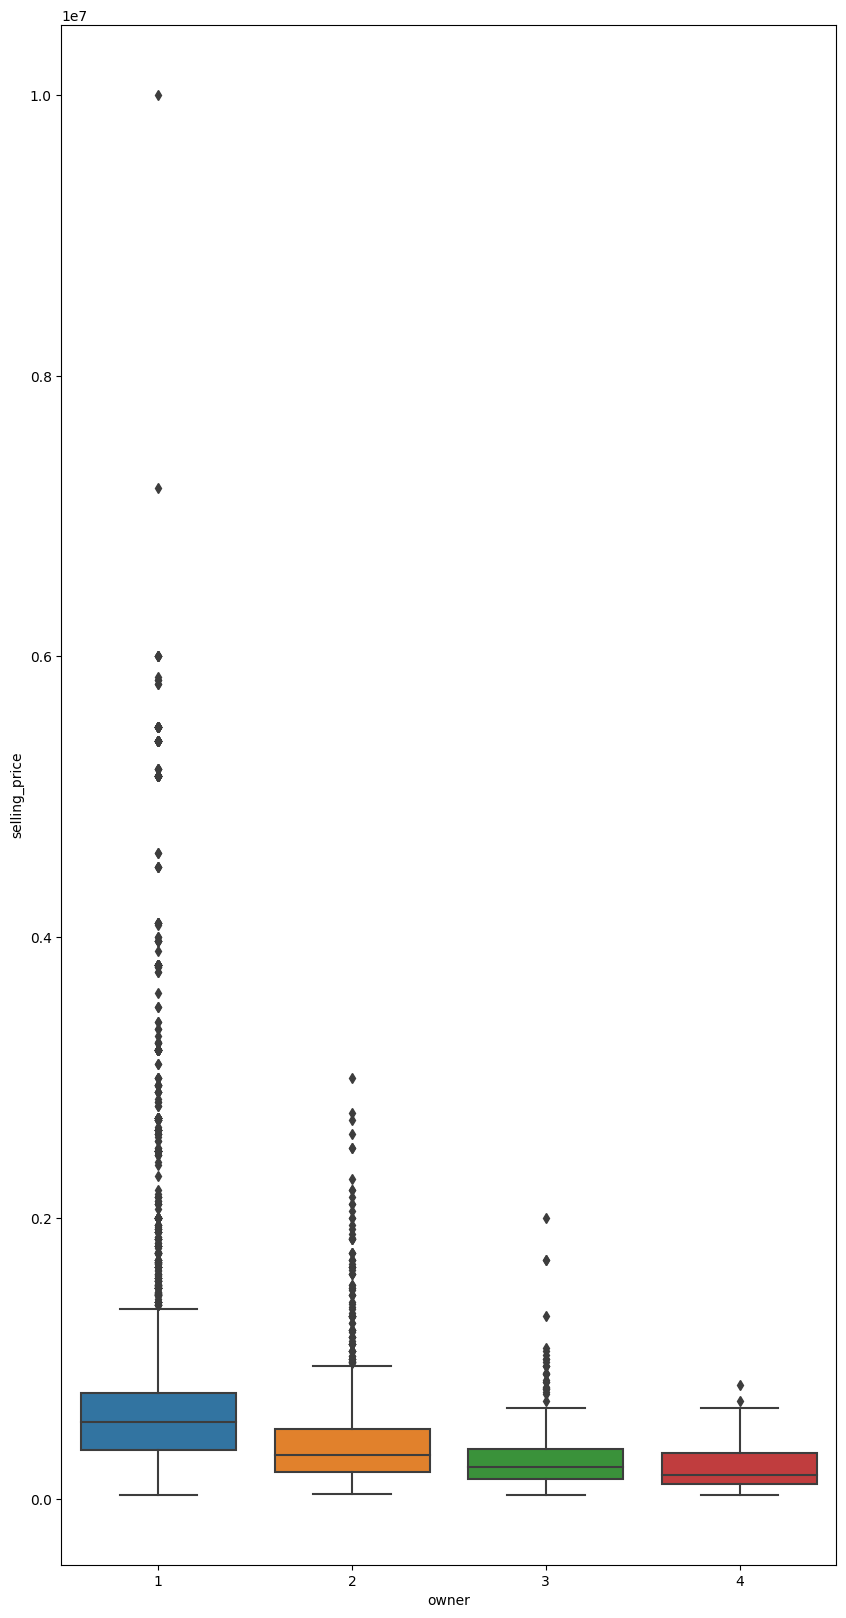

In [28]:
df_copy = df_copy[df_copy["owner"] != 5]
plt.figure(figsize = (10,20))
sns.boxplot(data = df_copy, x = "owner", y = "selling_price")

In [29]:
# Convert features of fuel, seller_type and transmission into number by using LabelEncoder of Sckit learn library
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy["fuel"] = le.fit_transform(df_copy["fuel"])
df_copy["seller_type"] = le.fit_transform(df_copy["seller_type"])
df_copy["transmission"] = le.fit_transform(df_copy["transmission"])
df_copy.head(10)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,440000,45000,1,1,1,1,20.14,1197.0,81.86,5.0
7,Maruti,2001,45000,5000,1,1,1,2,16.10,796.0,37.00,4.0
8,Toyota,2011,350000,90000,0,1,1,1,23.59,1364.0,67.10,5.0
9,Ford,2013,200000,169000,0,1,1,1,20.00,1399.0,68.10,5.0
10,Renault,2014,500000,68000,0,1,1,2,19.01,1461.0,108.45,5.0


<Axes: >

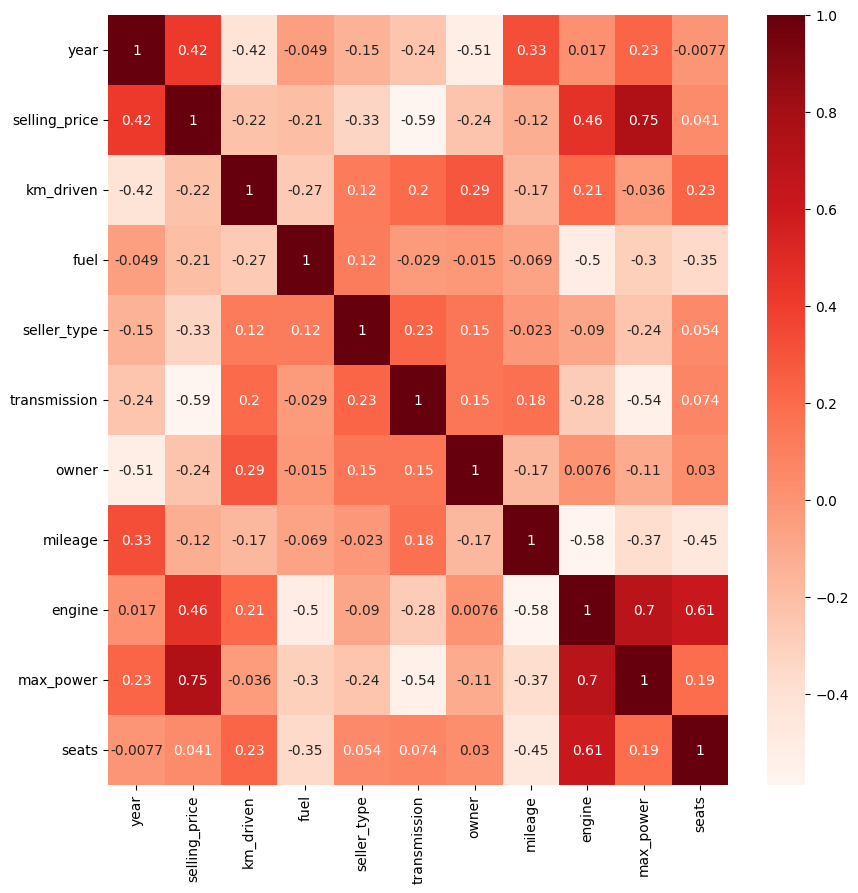

In [30]:
# Show heatmap with red color
plt.figure(figsize = (10,10))
sns.heatmap(df_copy.corr(), annot = True, cmap = "Reds")

<Axes: xlabel='x', ylabel='y'>

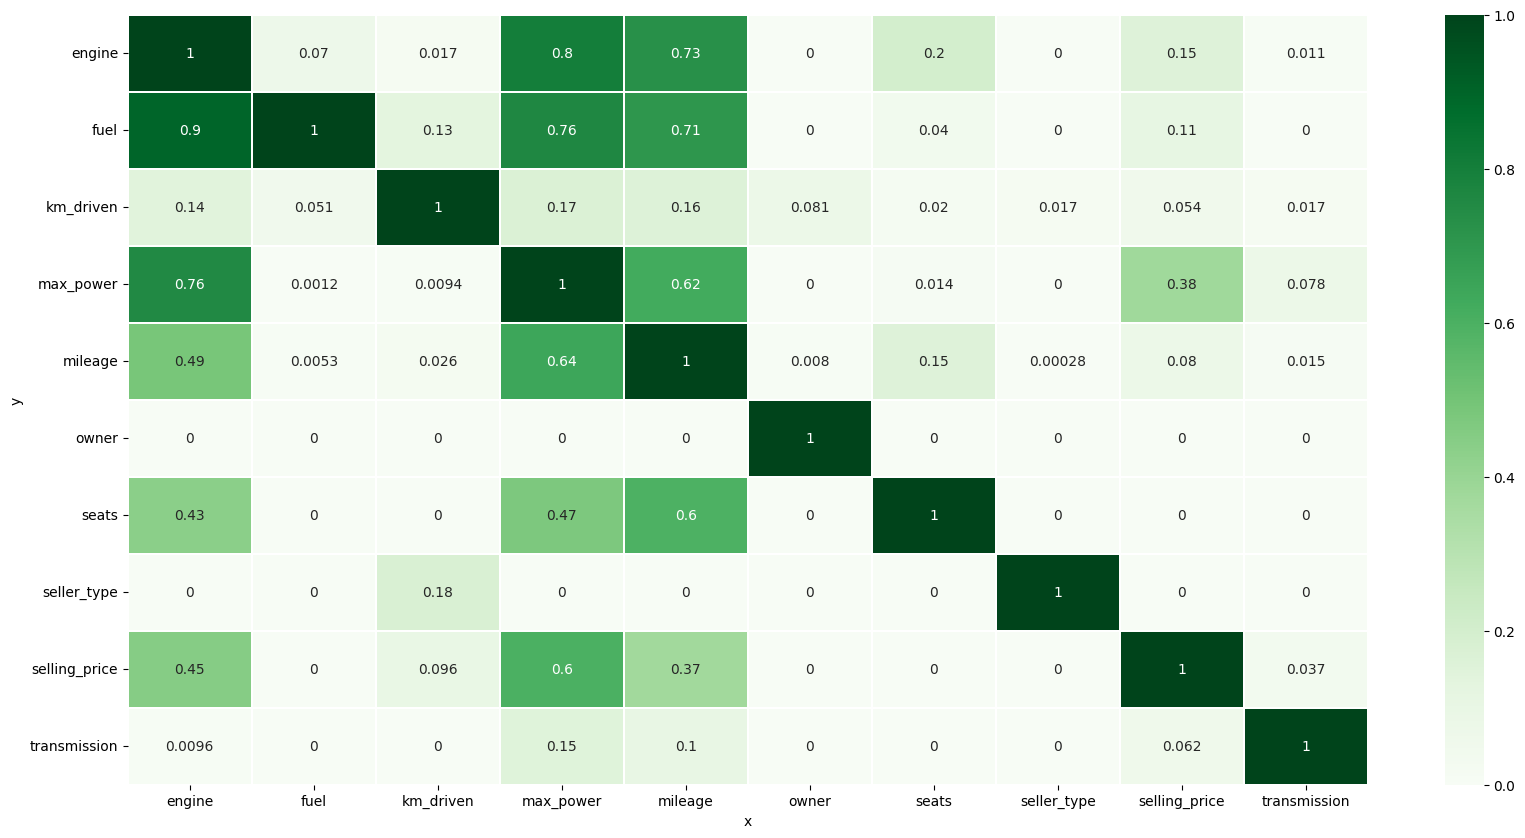

In [31]:
# Verify actual prediction by PPScore
import ppscore as pps

# delete brand and year
dfcopy = df_copy.copy()
dfcopy.drop(['brand', 'year'], axis= 1, inplace=True)
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize = (20,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Greens", linewidths=0.25, annot=True)

# 3 Feature Engineering

Since km_driven is a big number, it can cause your prediction to be very unstable. One trick
is to first transform the label using log transform

In [32]:
df_copy["log_km_driven"] = np.log(df_copy["km_driven"])
df_copy.head(15)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,log_km_driven
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0,11.887931
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0,11.695247
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0,11.849398
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0,11.751942
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0,11.695247
5,Hyundai,2017,440000,45000,1,1,1,1,20.14,1197.0,81.86,5.0,10.714418
7,Maruti,2001,45000,5000,1,1,1,2,16.10,796.0,37.00,4.0,8.517193
8,Toyota,2011,350000,90000,0,1,1,1,23.59,1364.0,67.10,5.0,11.407565
9,Ford,2013,200000,169000,0,1,1,1,20.00,1399.0,68.10,5.0,12.037654
10,Renault,2014,500000,68000,0,1,1,2,19.01,1461.0,108.45,5.0,11.127263


<Axes: >

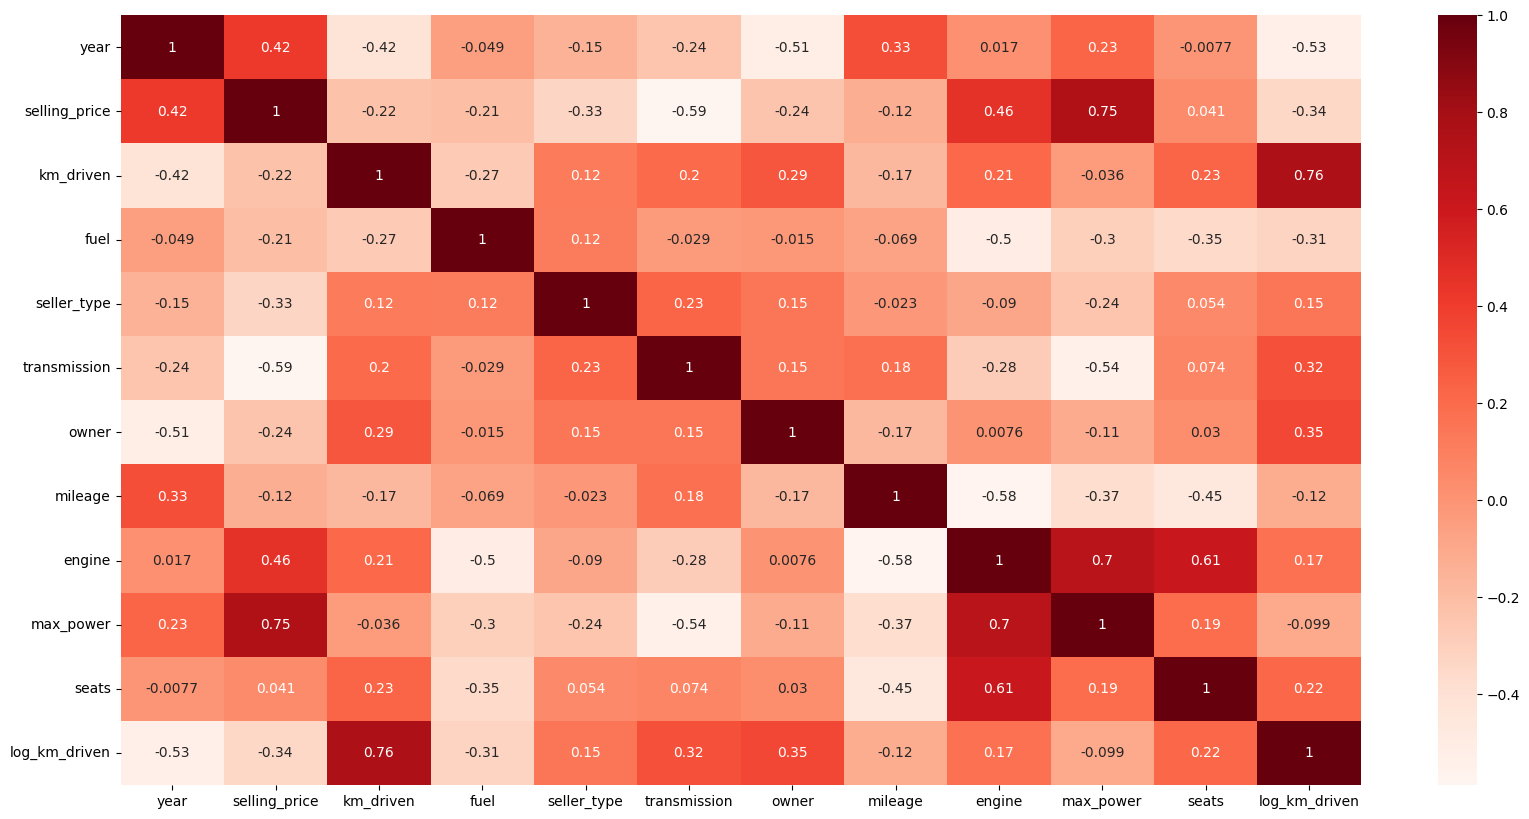

In [33]:
# Show a heatmap again
plt.figure(figsize = (20,10))
sns.heatmap(df_copy.corr(), annot = True, cmap = "Reds")

<Axes: xlabel='x', ylabel='y'>

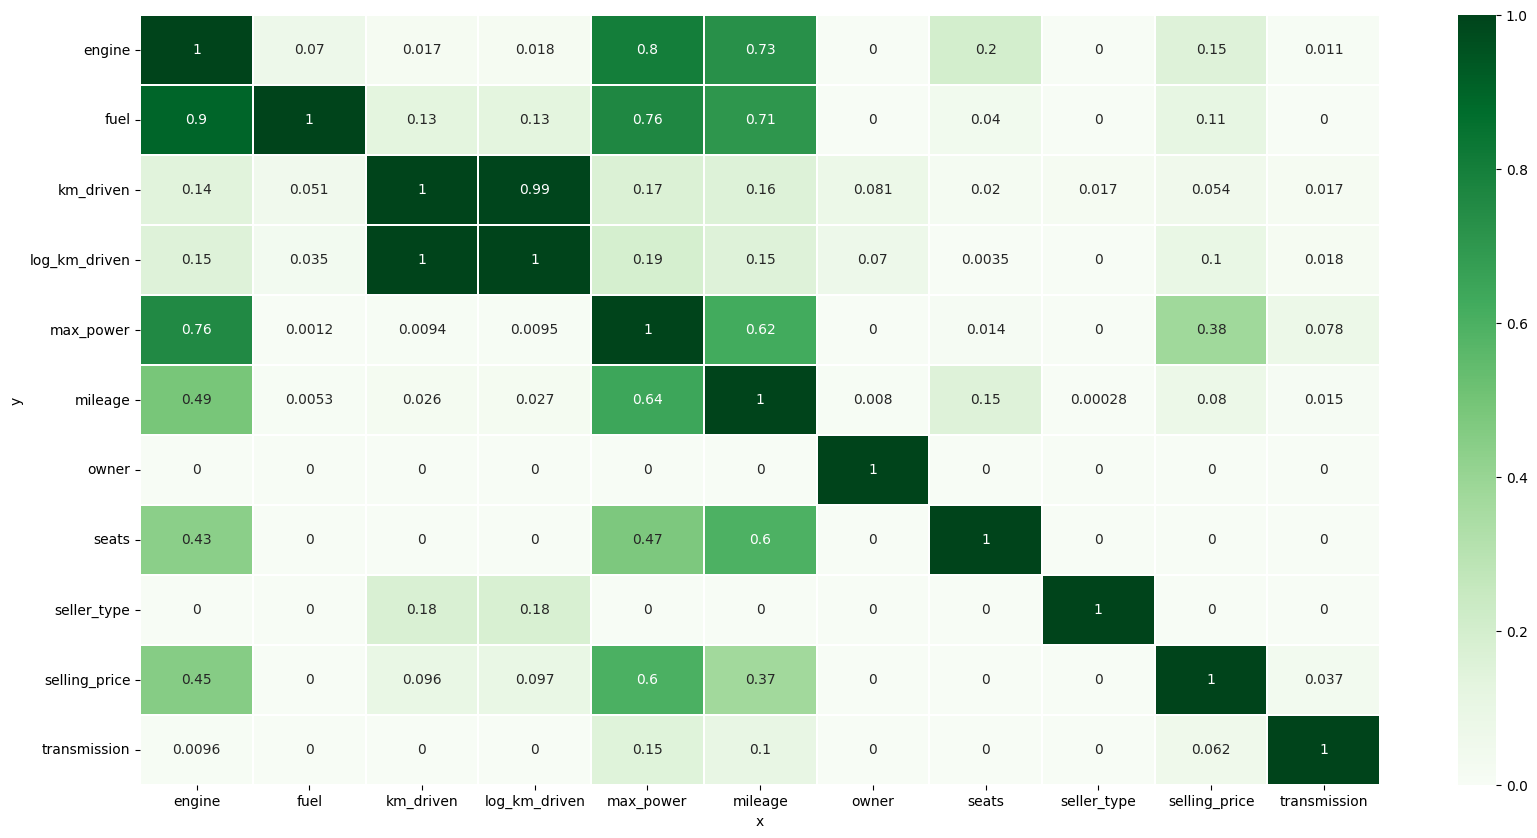

In [34]:
# show actual prediction in the heatmap again
dfcopy = df_copy.copy()
dfcopy.drop(['brand', 'year'], axis= 1, inplace=True)
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# plot
plt.figure(figsize = (20,10))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Greens", linewidths=0.25, annot=True)

# 4 Feature Selection

Releatd to heatmap and ppscore, the figures used for prediction are max_power, mileage and log_km_driven ( no using engine because it could make correlate with max_power and mileage)

In [35]:
X = df_copy[['max_power', 'mileage', 'log_km_driven']]

Since selling price is a big number, it can cause your prediction to be very unstable. One trick
is to first transform the label using log transform

In [36]:
y = np.log(df_copy['selling_price'])

In [37]:
# Train-test do to split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 30)

# 5 Preprocessing

Checking some Null Values Of xy_trian and xy_test

In [38]:
X_train.isnull().sum()

max_power        177
mileage          183
log_km_driven      0
dtype: int64

In [39]:
X_test.isnull().sum()

max_power        31
mileage          31
log_km_driven     0
dtype: int64

In [40]:
y_train.isnull().sum()

0

In [41]:
y_test.isnull().sum()

0

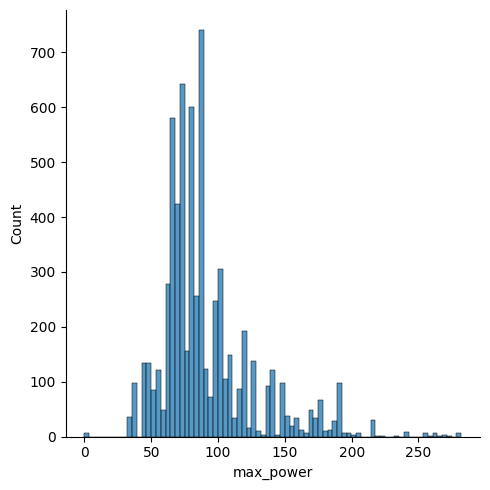

In [42]:
# Verify distribution of max_power
sns.displot(data=X_train, x = 'max_power')
plt.tight_layout()

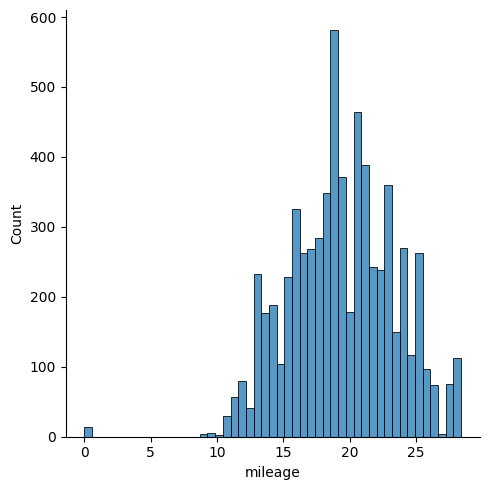

In [43]:
#verify distribution of mileage
sns.displot(data=X_train, x = 'mileage')
plt.tight_layout()

From two graphs, it shows that the distribution of mileage look like normal distribution while the distribution of max_power does not be the same. So, means is used for best option for mileage, while median is used to infill in max_power

In [44]:
# Fill training set 
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [45]:
# Fill testing set 
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [46]:
# Checking some null values of X training dataset and testing dataset again
X_train.isnull().sum()

max_power        0
mileage          0
log_km_driven    0
dtype: int64

In [47]:
X_test.isnull().sum()

max_power        0
mileage          0
log_km_driven    0
dtype: int64

using Outlier

<Axes: xlabel='mileage'>

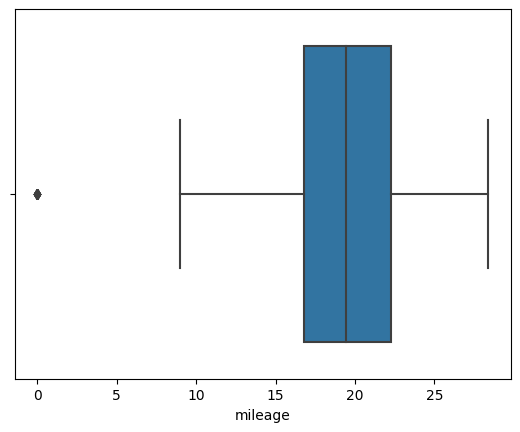

In [48]:
sns.boxplot(data = X_train, x = "mileage")

In [49]:
# show some rows in train_set data that have mileage lower than 5
X_train[X_train["mileage"]<5]

,max_power,mileage,log_km_driven
6629,70.00,0.0,11.289782
2725,62.10,0.0,9.615805
7337,194.00,0.0,11.002100
7002,62.10,0.0,11.289782
2137,115.00,0.0,11.078876
4527,165.00,0.0,11.608236
1649,62.00,0.0,11.759786
5846,103.25,0.0,10.243525
6824,62.00,0.0,10.596635
785,62.00,0.0,11.407565


<Axes: xlabel='max_power'>

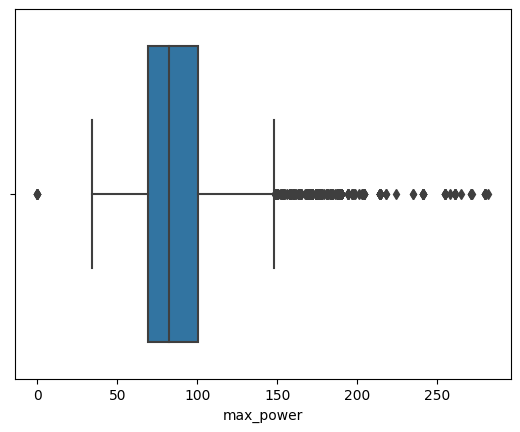

In [50]:
sns.boxplot(data = X_train, x = "max_power")

In [51]:
# Checking shape(columns,rows) of xy train & test features and target
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6823, 3)
Shape of X_test:  (1205, 3)
Shape of y_train:  (6823,)
Shape of y_test:  (1205,)


# 6 Model Selection

In [52]:
# Providing type of regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

algorithms = [LinearRegression(), Ridge(), Lasso(), SVR(),
              KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 200, random_state = 0),
              XGBRegressor(n_estimators = 200, random_state = 0)]

algorithm_names = ["Linear Regression", "Ridge", "Lasso", "SVR", "KNeighbors Regressor", 
                   "Decision-Tree Regressor", "Random-Forest Regressor","XGBRegressor"]


In [53]:
# defining splits of kfold
kfold = KFold(n_splits=8, shuffle=True)

# iterate for finding mse and mean mse for each model
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.23923995 -0.26796437 -0.26223743 -0.23342667 -0.23566482 -0.23870398
 -0.23826184 -0.26235085]; Mean: -0.24723123901365246
Ridge - Score: [-0.23237775 -0.25289125 -0.27194944 -0.25272263 -0.25038802 -0.24393952
 -0.23565159 -0.23829093]; Mean: -0.2472763914301057


Lasso - Score: [-0.32598053 -0.33306071 -0.32884386 -0.33983778 -0.36442018 -0.35484044
 -0.34348126 -0.34305086]; Mean: -0.3416894529634
SVR - Score: [-0.22728417 -0.25739686 -0.23734719 -0.22523036 -0.22548187 -0.22719038
 -0.25341246 -0.25585833]; Mean: -0.23865020108292945
KNeighbors Regressor - Score: [-0.11779405 -0.10522988 -0.10461822 -0.11198343 -0.10615456 -0.12003259
 -0.09672146 -0.13636528]; Mean: -0.11236243352668253
Decision-Tree Regressor - Score: [-0.12848791 -0.11999995 -0.14028946 -0.13986035 -0.10926322 -0.12272527
 -0.10878834 -0.14256495]; Mean: -0.12649743267761776
Random-Forest Regressor - Score: [-0.10361284 -0.10422078 -0.09409268 -0.09099536 -0.08368329 -0.09457376
 -0.11048321 -0.08407219]; Mean: -0.09571676429227102
XGBRegressor - Score: [-0.0903404  -0.0882214  -0.0944011  -0.08141079 -0.0762723  -0.09586827
 -0.0924791  -0.08829994]; Mean: -0.08841166179137205


Conclusion, XGBRegressor is better than  the other models for mse. So, it is selected for using best configuration.

**Use GridsearchCV**

Iterating to find the best parameters in XGBRegressor for car prediction model
- max_depth : [5, 10, 15]
- learning_rate : [0.01, 0.02, 0.05, 0.10]
- n_estimators : [200, 300, 400, 500, 600]

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15], 'learning_rate': [0.01, 0.02, 0.05, 0.1],
              'n_estimators': [200, 300, 400, 500, 600]}

rf = XGBRegressor(random_state = 10)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit the grid_search 
grid.fit(X_train, y_train);  

In [55]:
grid.best_params_

{'learning_rate': 0.02, 'max_depth': 10, 'n_estimators': 600}

In [56]:
# Find the best score of grid_search
best_mse = grid.best_score_
best_mse

-0.08681220665428699

# 7 Testing

In [57]:
# Testing XGBRegressor model
pred_y = grid.predict(X_test)
print("MSE is:",mean_squared_error(np.exp(y_test), np.exp(pred_y)))
print("R-squared is:", r2_score(np.exp(y_test), np.exp(pred_y)))

MSE is: 61333085872.04523
R-squared is: 0.9064915161613265


# 8. Analysis: Feature Importance

In [58]:
# Finding importance feature after applying XGBRegressor model
rf = grid.best_estimator_
rf.feature_importances_

array([0.76958454, 0.15774278, 0.07267267], dtype=float32)

Text(0.5, 0, 'Random Forest is Feature Importance after applying XGBRegressor model')

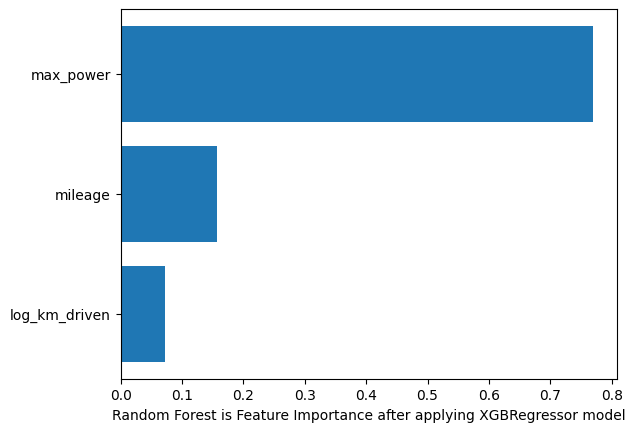

In [59]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest is Feature Importance after applying XGBRegressor model")

# 9. Inference (editing)

In [60]:
import pickle

 
filename = 'car_prediction.model'
pickle.dump(grid, open(filename, 'wb'))

In [61]:
# for testing it have to load the model first
loaded_model = pickle.load(open(filename, 'rb'))

In [62]:
df_copy[["max_power","mileage","log_km_driven","selling_price"]].loc[15]

max_power            82.000000
mileage              18.150000
log_km_driven        10.596635
selling_price    400000.000000
Name: 15, dtype: float64

In [63]:
# Checking if model could be applied.
sample = np.array([[82, 18.15, 10.596635]])
predicted_life_exp = loaded_model.predict(sample)
np.exp(predicted_life_exp)

array([376243.44], dtype=float32)

# Summary

As model selection, the XGBRegressor performs better predictions than other models because it can handle large amounts of data and handles linear or non-linear relationships well. Compared with random forests and decision trees, linear models such as Lasso, SVM or linear regression have high average mean square error. So that the relationship between characteristics and goals is hardly linear.

Moreover, mse is pretty high since the target's figure is quite high, making the selling price prediction inaccurate and r-square is around 0.9 that means the prediction is good.

From features importance, becuase max power is totally correlated to selling price based on predictive power score and correlation heatmap, this feature is more powerful than mileage and log_km_driven. Although transmission has strong correlation which was found from correlation heatmap, there is still low actual correlation between this feature and selling price based on predictive power score.